# Business Understanding and Set-up
Purpose: Ask relevant questions and define objectives for the problem that needs to be tackled
## Background
**About Kickstarter**

In recent years, the range of funding options for projects created by individuals and small companies has expanded considerably. In addition to savings, bank loans, friends & family funding and other traditional options, crowdfunding has become a popular and readily available alternative. 

Kickstarter, founded in 2009, is one particularly well-known and popular crowdfunding platform. It has an all-or-nothing funding model, whereby a project is only funded if it meets its goal amount; otherwise no money is given by backers to a project.
A huge variety of factors contribute to the success or failure of a project — in general, and also on Kickstarter. Some of these are able to be quantified or categorized, which allows for the construction of a model to attempt to predict whether a project will succeed or not. The aim of this project is to construct such a model and also to analyse Kickstarter project data more generally, in order to help potential project creators assess whether or not Kickstarter is a good funding option for them, and what their chances of success are.

**Final Deliverables**
- Slide deck PDF pushed to GitHub designed for non-technical stakeholders outlining findings and recommendations, as well as future work (10min presentation). 
- Jupyter notebook following PEP8 designed for data science / technical audience. 

**Things to think about**
- Try different (at least 3) machine learning algorithms to check which performs best on the problem at hand
- What would be right performance metric: Precision, recall, accuracy, F1 score, or something else? (Check TPR?)
- Check for data imbalance

## Key Question
We are tasked by Kickstarter to come up with a model to predict in a first step whether a campaign is likely to be successful, given certain project parameters. In a second step (out-of-scope), Kickstarter would like to be able to provide a good goal recommendation for project creators (particularly as Kickstarter can influence certain parameters such as staff picks).
* Given certain project parameters, **is a campaign likely to succeed or fail** (classification)?
* What would be a **reasonable goal recommendation for project creators** (regression, out-of-scope)?


## Glossary
* **TARGET: SUCCESS** - New column with 1 for success, 0 for fail (alternative for target: converted_pledged_amount)
* **backers_count** - The number of supporters that actually invested in the project
* **blurb** - A short description of a book, film, or other product written for promotional purposes
* **category** - Main category the project falls in (e.g. "food", "music")
* **converted_pledged_amount** - Pledged amount of USD realised at the deadline, converted from "pledged" via "static_usd_rate", rounded
* **country** - Country of origin of the project
* **created_at** - Date when Project was created (UNIX Format)
* **creator** - 
* **currency** - Currency of the project (e.g. USD, GBP)
* **currency_symbol** - Symbol of the currency
* **currency_trailing_code** - Defines whether the currency codes are always shown after the amount, independent of the locale
* **current_currency** - Currency of the project (e.g. USD, GBP) : Same as currency
* **deadline** - Deadline of the project (can be used to analyze timeframes)
* **disable_communication** - 
* **file** - Corresponding csv-file where the entry was taken from
* **friends** - 208922 NaN and 300 empty lists
* **fx_rate** - Used to create 'converted_pledged_amount' from 'pledged', but does not always convert to dollars so can be dropped in favour of 'static_usd_rate' which always converts to dollars
* **goal** - Amount of USD the project asked for initially
* **id** / **project_id** - Unique project id (redundant, so "id" is dropped)
* **is_backing** - 208922 NaN and 300 empty lists
* **is_starrable** - 
* **is_starred** - 
* **launched_at** - Launch date of the project (can be used to analyze timeframes) / UNIX Format
* **location** - Location of the project
* **name** - Name of the project
* **permissions** - 208922 NaN and 300 empty lists
* **photo** - 
* **pledged** - Unconverted pledge amount as float
* **profile** - 
* **slug** - Creator-selected keyword id of the project
* **source_url** - Source of the data by categories
* **spotlight** - Spotlight allows creators to make a home for their project on Kickstarter after they've been successfully funded. Each creator can take control of their page and build a customized, central hub for news, updates, links to finished work, and anything else they want the world to know about their project
* **staff_pick** - Staff picks was a feature that highlighted promising projects on the site to give them a boost by helping them get exposure through the email newsletter and highlighted spots around the site. The old 'Kickstarter Staff Pick' badge.
* **state** - Was the project successful at the end of the day? state is a categorical variable divided into the levels successful, failed, live, cancelled, undefined and suspended. For the sake of clarity, we will only look at whether a project was successful or failed (hence, we will remove all projects that are not classified as one of the two). Projects that failed or were successful make up around 88% of all projects.
* **state_changed_at** - 
* **static_usd_rate** - "Rate of conversion from "currency" to USD
* **urls** - 
* **usd_pledged** - Pledged amount of USD realised at the deadline, converted from "pledged" via "static_usd_rate"
* **usd_type** - it is unclear what this column means, but it is unlikely to be necessary since all currency values will be converted to dollars, and other currency information has been dropped. (NaN where "current currency" is not USD)

## Variable Description
* **data_raw** - Originally imported dataset
* **data** - Main working dataset containing cleaned and refined data
* **data_insp** - Copy of data before 3 Data Cleaning used during 3.1 Inspection
* **data_clean** - Copy of data after 3 Data Cleaning used during 4 Data Exploration

## Outcome/Recommendations
- See respective chapter

## To-Do-List / Open Questions (with notes)
- Is the data/csv's [monthly snapshot data](https://aito.ai/example-gallery/predict-and-explain-a-kickstarter-campaign-success/)? i.e., are the multiple ID entries just projects that span multiple months? Shouldn't they be more then? --> working assumption: no, as the data in each csv file is spread over a decade
- Investigate TARGET: SUCCESS via "state": 
  - Should we drop all that are not successful or state? --> yes
  - Is there a connection between "canceled", "live", "suspended" and the occurrence of multiple ID's? --> yes, partly
- Do we have duplicate projects? --> yes, we have same IDs frequently. Only the entry with the highest usd_pledged is kept

## Dashboard
Purpose: Define global variables and visuals

In [1024]:
random_state = 100
test_size = 0.3
n_reduced = 5000
scoring = "roc_auc" # Options: "f1", "recall", "precision", "accuracy", "roc_auc"
# Reasoning: target "state" is distributed roughly 85:15, so both accuracy and f1_score can be optimized through 100% recall
pd.set_option('display.max_columns', 50)
sns.set(style="white")

**Import libraries (overarching)**

In [1025]:
# Import overarching libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
import scipy as sc
from scipy.stats import kstest
from scipy.stats import zscore
import seaborn as sns
import math

import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

%matplotlib inline

#Subplots
from plotly.subplots import make_subplots
from numpy import median

# Data Mining
Purpose: Gather and scrape the data necessary for the project

In [1026]:
# Import libraries
from numpy import loadtxt
import os, glob

In [1027]:
# Import multiple csv files and merge into one dataframe
all_files = glob.glob(os.path.join("data", "*.csv"))
all_df = []
for f in all_files:
    df = pd.read_csv(f, sep=',')
    df['file'] = f.split('/')[-1]
    all_df.append(df)
data_raw = pd.concat(all_df, ignore_index=True, sort=True)

In [1028]:
# Assign data_raw to data
data = data_raw.copy()

# Data Cleaning
Purpose: Fix the inconsistencies within the data and handle the missing values

In [1029]:
# Import libraries
from datetime import datetime
import ast

## Inspection
Purpose: Getting a good sense of the data

In [1030]:
# Create dataset for inspection
data_insp = data.copy()

In [1031]:
# Display shape of "data"
data_insp.shape

(209222, 38)

In [1032]:
# Display head(5) of "data_insp"
data_insp.head(6)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,file,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,315,Babalus Shoes,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",28645,US,1541459205,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...",USD,$,True,USD,1552539775,False,Kickstarter040.csv,NaN,1.000000,28000.0,2108505034,NaN,False,NaN,1548223375,"{""id"":2462429,""name"":""Novato"",""slug"":""novato-c...",Babalus Children's Shoes,NaN,"{""key"":""assets/023/667/205/a565fde5382d6b53276...",28645.0,"{""id"":3508024,""project_id"":3508024,""state"":""in...",babalus-childrens-shoes,https://www.kickstarter.com/discover/categorie...,False,False,live,1548223375,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",28645.000000,international
1,47,A colorful Dia de los Muertos themed oracle de...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",1950,US,1501684093,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,USD,1504976459,False,Kickstarter040.csv,NaN,1.000000,1000.0,928751314,NaN,False,NaN,1502384459,"{""id"":2400549,""name"":""Euless"",""slug"":""euless-t...",The Ofrenda Oracle Deck,NaN,"{""key"":""assets/017/766/989/dd9f18c773a8546d996...",1950.0,"{""id"":3094785,""project_id"":3094785,""state"":""ac...",the-ofrenda-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1950.000000,domestic
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...","{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",22404,US,1348987533,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,USD,1371013395,False,Kickstarter040.csv,NaN,1.000000,15000.0,928014092,NaN,False,NaN,1368421395,"{""id"":2423474,""name"":""Hollywood"",""slug"":""holly...","Record Electra's Debut Album (Pop, Rock, Class...",NaN,"{""key"":""assets/011/433/681/489fd66f7861fefd8c8...",22404.0,"{""id"":359847,""project_id"":359847,""state"":""inac...",record-electras-debut-album-pop-rock-classical,https://www.kickstarter.com/discover/categorie...,True,False,successful,1371013395,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",22404.000000,international
3,3,The Mist of Tribunal is a turn-based card game...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",165,GB,1483780271,"{""id"":196281496,""name"":""Artur Ordijanc (delete...",GBP,£,False,USD,1489425776,False,Kickstarter040.csv,NaN,1.308394,10000.0,596091328,NaN,False,NaN,1484245376,"{""id"":475457,""name"":""Kaunas"",""slug"":""kaunas-ka...",The Mist of Tribunal - A Card Game,NaN,"{""key"":""assets/015/091/198/216fbf1bdc3739e7971...",136.0,"{""id"":2825329,""project_id"":2825329,""state"":""in...",the-mist-of-tribunal-a-card-game,https://www.kickstarter.com/discover/categorie...,False,False,failed,1489425776,1.216066,"{""web"":{""project"":""https://www.kickstarter.com...",165.384934,domestic
4,3,"Livng with a brain impairment, what its like t...","{""id"":48,""name"":""Nonfiction"",""slug"":""publishin...",2820,US,1354817071,"{""id"":1178460181,""name"":""Dawn Johnston"",""is_re...",USD,$,True,USD,1357763527,False,Kickstarter040.csv,NaN,1.000000,2800.0,998516049,NaN,False,NaN,1355171527,"{""id"":2507703,""name"":""Traverse City"",""slug"":""t...",Help change the face of Brain Impairment,NaN,"{""key"":""assets/011/457/844/37ba63d35fefaba76e9...",2820.0,"{""id"":417385,""project_id"":417385,""state"":""inac...",help-change-the-face-of-brain-impairment,https://www.kickstarter.com/discover/categorie...,True,False,successful,1357763527,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2820.00000

In [1033]:
# Display columns of "data"
data_insp.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'file', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

In [1034]:
#datatest = data.converted_pledged_amount - data.usd_pledged

In [1035]:
#datatest.sort_values(ascending=False).head()

In [1036]:
#data.iloc[79591]

In [1037]:
# Compare with random single csv file
data0 = pd.read_csv("data/Kickstarter015.csv")
data.shape

(209222, 38)

In [1038]:
# Describe data (summary)
data_insp.describe().round(2)

,backers_count,converted_pledged_amount,created_at,deadline,fx_rate,goal,id,launched_at,pledged,state_changed_at,static_usd_rate,usd_pledged
count,209222.00,209222.00,2.092220e+05,2.092220e+05,209222.00,2.092220e+05,2.092220e+05,2.092220e+05,209222.00,2.092220e+05,209222.00,209222.00
mean,145.42,12892.90,1.456089e+09,1.463033e+09,0.99,4.917604e+04,1.073222e+09,1.460206e+09,18814.03,1.462838e+09,1.01,12892.13
std,885.97,88894.14,6.339711e+07,6.305618e+07,0.21,1.179427e+06,6.198051e+08,6.309029e+07,322959.62,6.290421e+07,0.23,88901.24
min,0.00,0.00,1.240366e+09,1.241334e+09,0.01,1.000000e-02,8.624000e+03,1.240603e+09,0.00,1.241334e+09,0.01,0.00
25%,4.00,106.00,1.413317e+09,1.420607e+09,1.00,1.500000e+03,5.351054e+08,1.417639e+09,110.00,1.420485e+09,1.00,106.00
50%,27.00,1537.00,1.457895e+09,1.464754e+09,1.00,5.000000e+03,1.074579e+09,1.461924e+09,1556.00,1.464709e+09,1.00,1537.36
75%,89.00,6548.00,1.511595e+09,1.519437e+09,1.00,1.500000e+04,1.609369e+09,1.516694e+09,6887.20,1.519366e+09,1.00,6550.00
max,105857.00,8596474.00,1.552527e+09,1.557721e+09,1.88,1.000000e+08,2.147476e+09,1.552537e+09,81030744.00,1.552537e+09,1.72,8596474.58


In [1039]:
# List datatypes (data.info())
data_insp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 38 columns):
backers_count               209222 non-null int64
blurb                       209214 non-null object
category                    209222 non-null object
converted_pledged_amount    209222 non-null int64
country                     209222 non-null object
created_at                  209222 non-null int64
creator                     209222 non-null object
currency                    209222 non-null object
currency_symbol             209222 non-null object
currency_trailing_code      209222 non-null bool
current_currency            209222 non-null object
deadline                    209222 non-null int64
disable_communication       209222 non-null bool
file                        209222 non-null object
friends                     300 non-null object
fx_rate                     209222 non-null float64
goal                        209222 non-null float64
id                          209

In [1040]:
# List unique entries per column
data_insp.nunique()

backers_count                 3246
blurb                       180700
category                       169
converted_pledged_amount     31387
country                         22
created_at                  182158
creator                     208562
currency                        14
currency_symbol                  6
currency_trailing_code           2
current_currency                 5
deadline                    170854
disable_communication            2
file                            56
friends                          1
fx_rate                         67
goal                          5110
id                          182264
is_backing                       1
is_starrable                     2
is_starred                       2
launched_at                 182109
location                     15235
name                        181680
permissions                      1
photo                       182263
pledged                      44387
profile                     182265
slug                

In [1041]:
# List correlation values
data_insp.corr()

,backers_count,converted_pledged_amount,created_at,currency_trailing_code,deadline,disable_communication,fx_rate,goal,id,is_starrable,launched_at,pledged,spotlight,staff_pick,state_changed_at,static_usd_rate,usd_pledged
backers_count,1.000000,0.805201,0.025763,0.010566,0.031456,-0.007194,0.003313,0.010019,-0.002635,-0.006344,0.031367,0.251022,0.123834,0.157586,0.031798,-0.000877,0.804528
converted_pledged_amount,0.805201,1.000000,0.031417,0.011129,0.036793,-0.005632,0.001674,0.010144,-0.001675,-0.006009,0.036437,0.311144,0.108999,0.143488,0.037109,-0.002628,0.999861
created_at,0.025763,0.031417,1.000000,-0.163048,0.983713,-0.005590,-0.067095,0.003976,-0.003722,0.259400,0.983917,0.027735,-0.038476,-0.044145,0.983657,-0.103533,0.031305
currency_trailing_code,0.010566,0.011129,-0.163048,1.000000,-0.159145,-0.003072,-0.530710,-0.001589,0.003703,-0.029686,-0.159141,-0.014496,0.026252,0.008887,-0.159209,-0.588899,0.010939
deadline,0.031456,0.036793,0.983713,-0.159145,1.000000,-0.007501,-0.066400,0.004798,-0.002373,0.265997,0.999869,0.029352,-0.036473,-0.035992,0.999926,-0.104718,0.036689
disable_communication,-0.007194,-0.005632,-0.005590,-0.003072,-0.007501,1.000000,-0.006571,0.008566,0.003209,-0.010032,-0.007664,-0.002400,-0.061833,-0.021032,-0.009238,-0.003848,-0.005637
fx_rate,0.003313,0.001674,-0.067095,-0.530710,-0.066400,-0.006571,1.000000,-0.034576,-0.002264,-0.009580,-0.065782,-0.086680,0.019898,-0.000702,-0.066377,0.962465,0.001465
goal,0.010019,0.010144,0.003976,-0.001589,0.004798,0.008566,-0.034576,1.000000,0.001609,-0.000269,0.004305,0.127876,-0.033962,-0.004262,0.004632,-0.031928,0.010240
id,-0.002635,-0.001675,-0.003722,0.003703,-0.002373,0.003209,-0.002264,0.001609,1.000000,0.001471,-0.002432,-0.003055,-0.000518,0.003184,-0.002404,-0.002388,-0.001697
is_starrable,-0.006344,-0.006009,0.259400,-0.029686,0.265997,-0.010032,-0.009580,-0.000269,0.001471,1.000000,0.264429,-0.002045,-0.207692,-0.019257,0.257530,-0.035726,-0.006544


In [1042]:
# List missing values

def count_missing(data):
    null_cols = data_insp.columns[data.isnull().any(axis=0)]
    X_null = data[null_cols].isnull().sum()
    X_null = X_null.sort_values(ascending=False)
    print(X_null)
    
count_missing(data_insp)

permissions    208922
is_starred     208922
is_backing     208922
friends        208922
usd_type          480
location          226
blurb               8
dtype: int64


## Observations
- High correlation:
  - usd_pledged contains all values in USD, while converted_pledged_amount contains all values in "current_currency" (drop the latter)
  - backers_count and converted_pledged_amount (create avg_backing, then drop backers_count)
  - Only 182.264 unique ID's, so projects can be listed multiple times (depending on what? changing state?)
  - is_starrable only applies to projects with state "live"
  - disable_communication only applies to (all) projects with state "suspended"

## Data Handling
Purpose: Construct a clean dataset

**Drop unnecessary columns and rows**

In [1043]:
# Initial drop of unnecessary columns
data.drop(["blurb", 'converted_pledged_amount', 'currency_symbol', 'disable_communication', 'file', 'friends', 'fx_rate', 'is_backing', 'is_starrable', 'is_starred', 'location', 'name', 'permissions', 'photo', 'pledged', 'slug', "urls"], axis=1, inplace=True)

In [1044]:
# Initial drop of unnecessary rows
indexNames = data[(data['state']!="successful") & (data['state']!="failed")].index
# Delete these row indexes from dataFrame
data.drop(indexNames,inplace=True)

#Alternative:
#data = data[(data["state"]=="successful") | (data["state"]=="failed")].copy()
data.reset_index(drop=True, inplace=True)

In [1045]:
# Check whether "id" and "project_id" are redundant (i.e. refer to the same)
#sum(data.groupby("id")["project_id"].nunique())

In [1046]:
# Drop all duplicate rows in order to remove duplicates of "project_id" (around 25.000)
data.drop_duplicates(subset=data.columns, keep='last', inplace=True)

In [1047]:
# Extract project_id of "profile" (in contrast to "id", "project_id" increments in relation to "created_at")
data["project_id"] = [int(data.profile[i].split('"')[4][1:-1]) for i in range(len(data.profile))]

In [1048]:
# Drop remaining "project_id" duplicates based on "usd_pledged" (keep higher pledge value)
data = data.sort_values('usd_pledged', ascending=False).drop_duplicates(subset="project_id", keep="first")   

In [1049]:
# Validate whether "usd_pledged" >= "goal" actually results in state==1 ("successful") (1/2)
data["goal_reached"] = (data["usd_pledged"])>=(data["goal"])
data.groupby("goal_reached")["state"].value_counts()

goal_reached  state     
False         failed        74116
              successful     5566
True          successful    89213
              failed           84
Name: state, dtype: int64

In [1050]:
# Validate whether "usd_pledged" >= "goal" actually results in state==1 ("successful") (2/2)
data[(data["usd_pledged"]<data["goal"]) & (data["state"]=="successful")].head(3)

,backers_count,category,country,created_at,creator,currency,currency_trailing_code,current_currency,deadline,goal,id,launched_at,profile,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,usd_pledged,usd_type,project_id,goal_reached
141864,12613,"{""id"":35,""name"":""Video Games"",""slug"":""games/vi...",JP,1513564265,"{""id"":476090608,""name"":""White Owls Inc."",""is_r...",JPY,False,USD,1525478400,68000000.0,128197700,1522083720,"{""id"":3252753,""project_id"":3252753,""state"":""ac...",https://www.kickstarter.com/discover/categorie...,True,True,successful,1525478401,0.009548,773674.250900,international,3252753,False
92009,1689,"{""id"":337,""name"":""Gadgets"",""slug"":""technology/...",SE,1544793895,"{""id"":728134463,""name"":""PrintDreams"",""slug"":""p...",SEK,True,USD,1548975540,4500000.0,715478163,1545388643,"{""id"":3535152,""project_id"":3535152,""state"":""ac...",https://www.kickstarter.com/discover/categorie...,True,True,successful,1548975541,0.109933,496151.645412,domestic,3535152,False
145737,1754,"{""id"":28,""name"":""Product Design"",""slug"":""desig...",JP,1525669820,"{""id"":992618958,""name"":""TRIKT"",""is_registered""...",JPY,False,USD,1530406863,10000000.0,1030656649,1527814863,"{""id"":3375463,""project_id"":3375463,""state"":""ac...",https://www.kickstarter.com/discover/categorie...,True,True,successful,1530406865,0.009208,482492.927754,international,3375463,False


In [1051]:
# Calculate "goal_converted" based on "goal" multiplied with "static_usd_rate"
data["goal_converted"] = data["goal"] * data["static_usd_rate"]

In [1052]:
# Validate whether converted_pledged_amount >= goal_converted now results in state==1 ("successful")
data["goal_reached_2"] = (data["usd_pledged"])>=(data["goal_converted"])
data.groupby("goal_reached_2")["state"].value_counts()

goal_reached_2  state     
False           failed        74197
                successful      116
True            successful    94663
                failed            3
Name: state, dtype: int64

In [1053]:
# Check for outliers
#data[(data["converted_pledged_amount"]>=data["goal_converted"]) & (data["state"]==0)]

In [1054]:
# Drop outlier with "project_id"==3434836 (state "unsuccessful" while "converted_pledged_amount" is 3x "goal_converted")
data.drop(137312, axis=0, inplace=True)

In [1055]:
# Reduce dataset to only include "serious" projects, which is defined by a threshold of at least 1.000 USD pledged
data = data[data.usd_pledged >= 1000]

In [1056]:
# Set "project_id" as the index
data.set_index("project_id", inplace=True)

**Clean feature content**

In [1057]:
# Extract category_sub from "category"
data["category_sub"] = [data.category[i].split('"')[5] for i in data.index]
data["category_sub"] = data["category_sub"].str.replace("%20", "_")

In [1058]:
# Extract category from "source_url"
data["category"] = [data.source_url[i].split("/")[5] for i in data.index]
data["category"] = data["category"].str.replace("%20", "_")

In [1059]:
# Extract creator_id of "creator"
data["creator_id"] = [int(data.creator[i].split('"')[2][1:-1]) for i in data.index]

In [1060]:
# Extract profile_state of "profile"
data["profile_state"] = [data.profile[i].split('"')[7] for i in data.index]

In [1061]:
# Extract profile_state_changed_at of "profile"
data["profile_state_changed_at"] = [data.profile[i].split('"')[10][1:-1] for i in data.index]

In [1062]:
# Display content of newly created columns
#data.creator_id.value_counts()
#data.project_id.value_counts()
#data.profile_state.value_counts()
#data.profile_state_changed_at.value_counts()
#data[data.creator_id == "1704592942"]

In [1063]:
# Extract city from "location" column (OPTIONAL, might not be needed)

In [1064]:
# Drop rows with non-numerical values (only if few!)
#data = data[pd.to_numeric(data['column_with_nonnum'], errors='coerce').notnull()]
#data['column_with_nonnum'] = data['column_with_nonnum'].astype('int')
#data.dtypes

In [1065]:
# Transform created_at from timestamp to datetime
data.created_at = pd.to_datetime(data.created_at, unit='s')

In [1066]:
# Transform deadline from timestamp to datetime
data.deadline = pd.to_datetime(data.deadline, unit='s')

In [1067]:
# Transform launched_at from timestamp to datetime
data.launched_at = pd.to_datetime(data.launched_at, unit='s')

In [1068]:
# Transform state_changed_at from timestamp to datetime
data.state_changed_at = pd.to_datetime(data.state_changed_at, unit='s')

In [1069]:
# Transform profile_state_changed_at from timestamp to datetime
data.profile_state_changed_at = pd.to_datetime(data.profile_state_changed_at, unit='s')

In [1070]:
# Create "deadline_yr"
data["deadline_yr"] = [date.year for date in data["deadline"]]
#alt.: data["deadline_yr"] = data["deadline"].dt.year()

In [1071]:
# Create "deadline_mth"
data["deadline_mth"] = [date.month for date in data["deadline"]]

In [1072]:
# Create "launched_at_yr"
data["launched_at_yr"] = [date.year for date in data["launched_at"]]

In [1073]:
# Create "launched_at_mth"
data["launched_at_mth"] = [date.month for date in data["launched_at"]]

In [1074]:
# Define baseline for launched_at and deadline by setting lowest yr/mth combination = 0 at January, 2009
#print(data.launched_at_yr.min(),data.launched_at_mth.min())
#print(data.deadline_yr.min(),data.deadline_mth.min())

In [1075]:
# Create continuous feature for months passed since earliest project deadline (January, 2009)
data["deadline_cont"] = (data.deadline_yr - 2009) * 12 + data.deadline_mth - 1

In [1076]:
# Create continuous feature for months passed since earliest project launched_at (January, 2009)
data["launched_at_cont"] = (data.launched_at_yr - 2009) * 12 + data.launched_at_mth - 1

In [1077]:
# Get project "campaign_days" as difference of "deadline" and "launched_at"
data["campaign_days"] = data.deadline - data.launched_at
data["campaign_days"] = data['campaign_days'].dt.round('d').dt.days

In [1078]:
# Convert currency_trailing_code to 1/0
data.currency_trailing_code.replace([True, False], [1, 0], inplace=True)

In [1079]:
# Convert spotlight to 1/0
data.spotlight.replace([True, False], [1, 0], inplace=True)

In [1080]:
# Convert staff_pick to 1/0
data.staff_pick.replace([True, False], [1, 0], inplace=True)

In [1081]:
# Convert state (TARGET) to 1/0
data.state.replace(["successful", "failed"], [1, 0], inplace=True)

In [1082]:
# Convert profile_state to 1/0
data.profile_state.replace(["active", "inactive"], [1, 0], inplace=True)

**Finalize data for exploration**

In [1083]:
# Post-cleaning drop of unnecessary columns
data.drop(["created_at", "creator", "currency", "currency_trailing_code", "current_currency", "deadline_mth", "goal", "goal_reached", "goal_reached_2", "id", "launched_at_mth", "profile", "profile_state_changed_at", "source_url", "state_changed_at", "static_usd_rate", "usd_type"], axis=1, inplace=True)

In [1084]:
# Sort all columns in "data" ascending by name
data = data.reindex(sorted(data.columns), axis=1)

In [1085]:
# Sort all rows in "data" ascending by "launched_at"
data = data.sort_values("launched_at", axis=0, ascending=True)

In [1086]:
# Revise dataset
#data.shape
#data.head()
#data.info()
#data.nunique()

# Data Exploration
Purpose: Form hypotheses about your defined problem by visually analyzing the data

In [1087]:
# Create data set for exploration
data_clean = data.copy()

In [1498]:
data_clean[data_clean.category == "music"].shape

(15832, 18)

In [1519]:
data_clean[(data_clean.category == "photography")&(data_clean.state == 1)].shape

(1877, 18)

In [1520]:
data_clean[(data_clean.category == "photography")&(data_clean.state == 0)].shape

(416, 18)

In [1088]:
# Drop features for exploration
#data_clean = data_clean.drop(["column1", "column2", "column3"], axis=1, inplace=True)

In [1089]:
# Separate continuous vs. categorical variables
data_cat_col = ['category', 'country', 'category_sub']
data_cont_col = [el for el in data_clean.columns if el not in data_cat_col]
data_cont = data_clean[data_cont_col]
data_cat = data_clean[data_cat_col]

In [1090]:
# Look at data skew (to check whether scaling with e.g. log makes sense for highly skewed features)
data_clean.skew()

backers_count        34.608810
campaign_days         1.241586
creator_id            0.001070
deadline_cont        -0.362856
deadline_yr          -0.350628
goal_converted      180.311804
launched_at_cont     -0.368000
launched_at_yr       -0.369804
profile_state         1.001867
spotlight            -2.172937
staff_pick            1.362497
state                -2.172937
usd_pledged          28.340298
dtype: float64

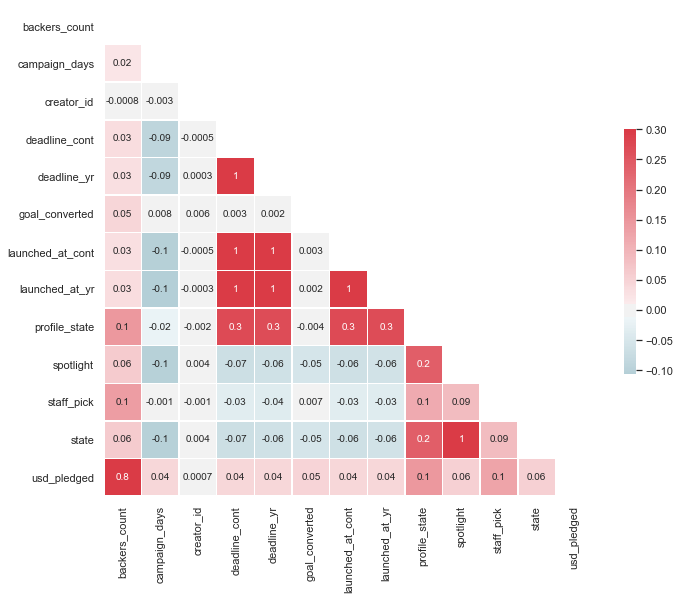

In [1091]:
# Plot correlation heatmap for continuous variables
#Generate a mask for the upper triangle
mask = np.triu(np.ones_like(data_cont.corr(), dtype=np.bool))

#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

#Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data_cont.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".1g");

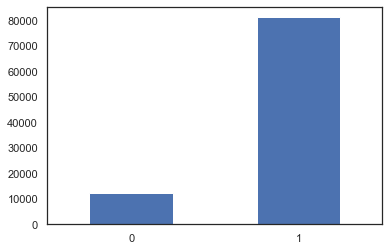

In [1092]:
data['state'].value_counts(ascending=True).plot(kind='bar', rot=0);

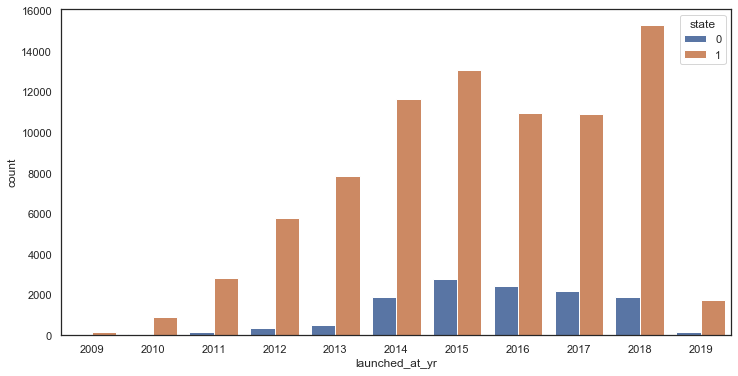

In [1093]:
# Countplot
plt.figure(figsize=(12,6))
sns.countplot(x="launched_at_yr", hue="state", data=data_clean);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


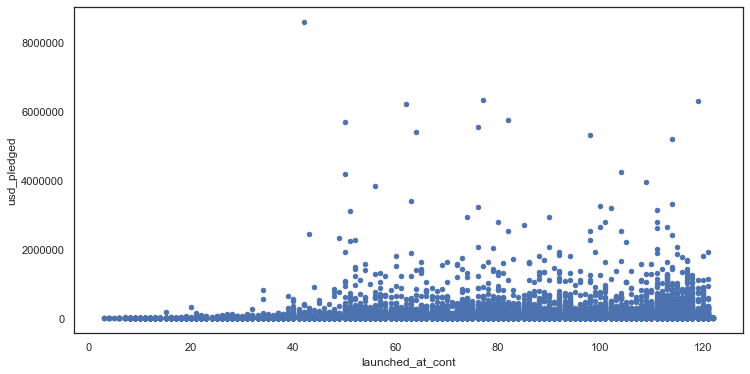

In [1094]:
# Plot scatterplot of "usd_pledged" over time
data_clean.plot(kind='scatter', x='launched_at_cont', y='usd_pledged', figsize=(12,6));

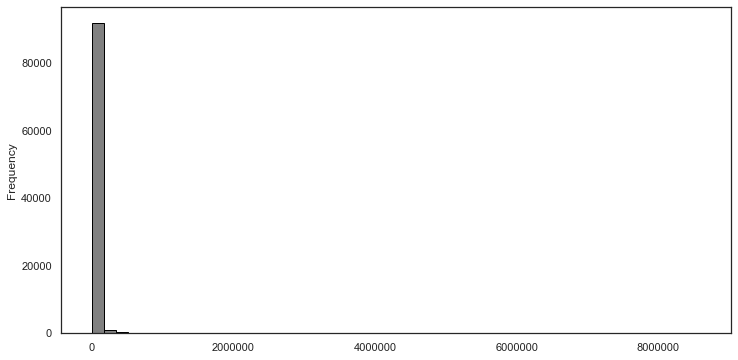

In [1095]:
# Plot histogram of "usd_pledged"
data_clean['usd_pledged'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black');

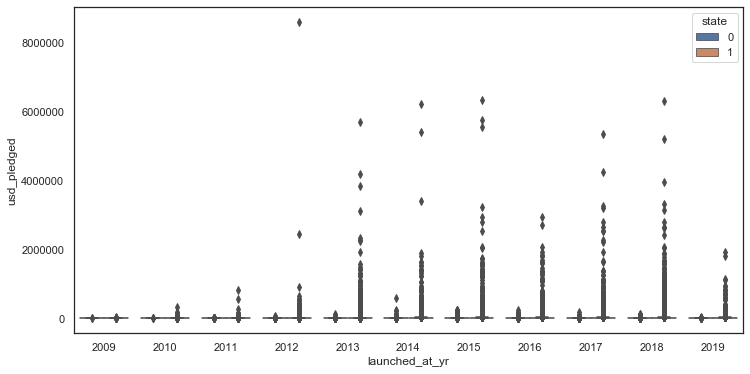

In [1096]:
# Plot boxplot of "usd_pledged"
plt.figure(figsize=(12,6))
sns.boxplot(x="launched_at_yr", y="usd_pledged", data=data_clean, hue="state", boxprops=dict(alpha=.2));

In [1097]:
# Plot hexbin of "usd_pledged" vs "goal_converted"

In [1098]:
# Plot catplot
#sns.catplot(x="converted_pledged_amount", y='goal_converted', data=data_clean, hue='state', kind="strip", col_wrap=4);

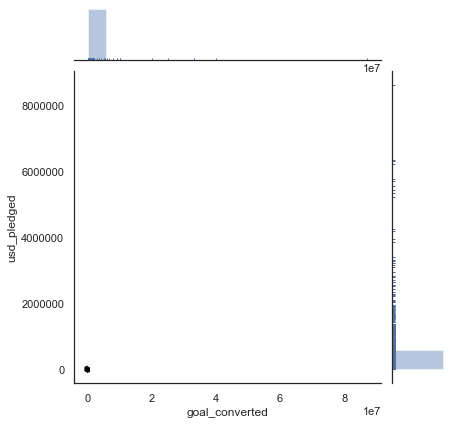

In [1099]:
# Plot jointplot (1 feature)
sns.jointplot('goal_converted', 'usd_pledged', data=data_clean, kind="hex", marginal_kws=dict(bins=15, rug=True), annot_kws=dict(stat="r"), linewidth=1);

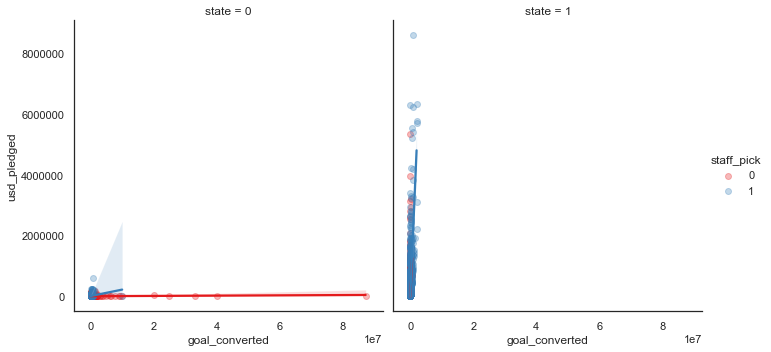

In [1100]:
# Plot lmplot (3 features)
sns.lmplot(y='usd_pledged', x='goal_converted', data=data_clean, hue='staff_pick', \
           col='state', palette='Set1', scatter_kws={'alpha':0.3});

In [1101]:
data.columns

Index(['backers_count', 'campaign_days', 'category', 'category_sub', 'country',
       'creator_id', 'deadline', 'deadline_cont', 'deadline_yr',
       'goal_converted', 'launched_at', 'launched_at_cont', 'launched_at_yr',
       'profile_state', 'spotlight', 'staff_pick', 'state', 'usd_pledged'],
      dtype='object')

In [1102]:
# Plot selection of variables as pairplot
#sns.pairplot(data_clean, kind="reg", vars=["backers_count", "campaign_days", "goal_converted", "launched_at_yr",
#                                          "launched_at_cont", "staff_pick", "state", "usd_pledged"], 
#             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}});

In [1103]:
# Plot all variables as pairplot
#sns.pairplot(data_clean[data_cont_col], hue='state', diag_kind='kde', height=2);

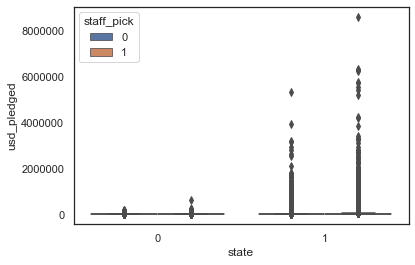

In [1104]:
# Plot boxplot of avg "converted_pledged_amount" and "goal_converted" per "state"
sns.boxplot(x="state", y="usd_pledged", hue="staff_pick", data=data_clean);

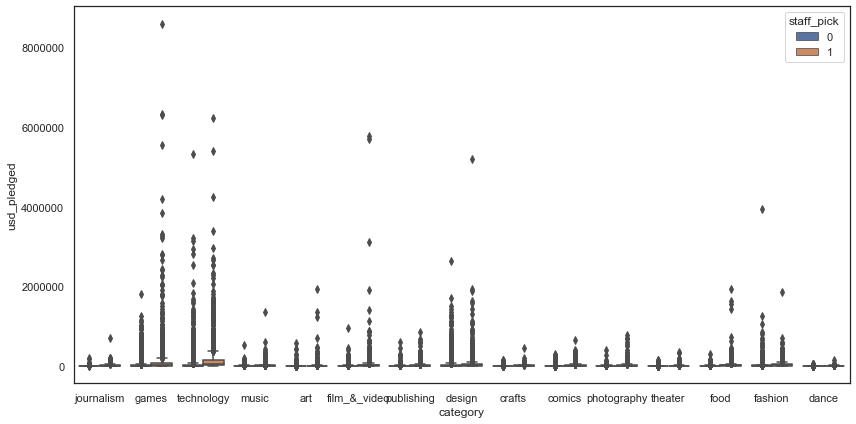

In [1105]:
# Plot boxplot of avg "converted_pledged_amount" and "goal_converted" per "category"
plt.figure(figsize=(12,6))
sns.boxplot(x="category", y="usd_pledged", hue="staff_pick", data=data_clean);
plt.tight_layout()

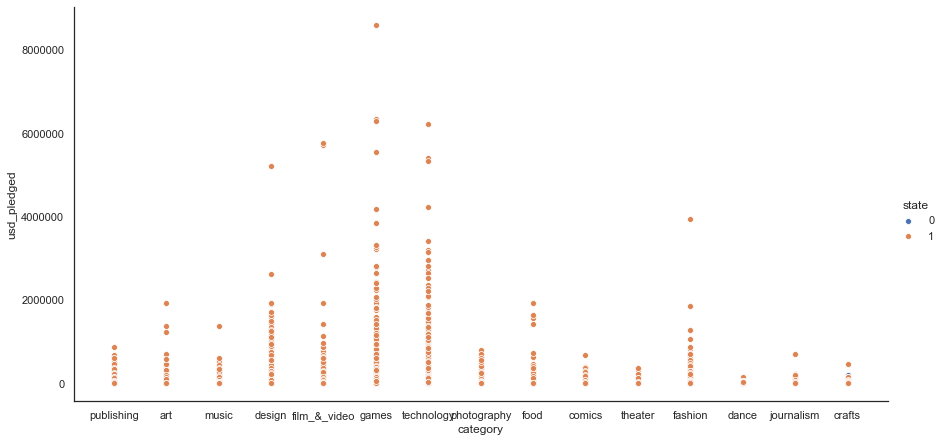

In [1106]:
# Plot per category
sns.pairplot(data_clean,
             x_vars=["category"],
             y_vars=["usd_pledged"],hue='state',height=6,aspect=2);
plt.savefig("figures/fig5_pairplot.png")

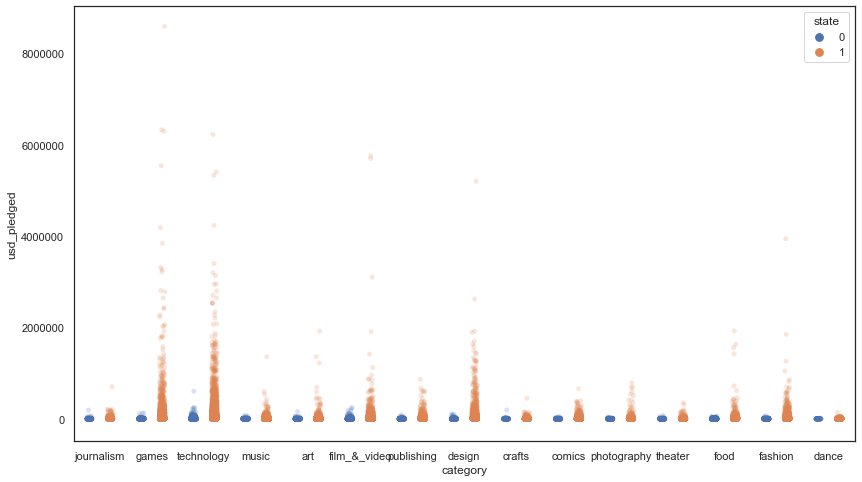

In [1107]:
# Stripplot
plt.figure(figsize=(14,8))
sns.stripplot(data=data_clean,jitter=True,alpha=.2,
             x="category",
             y="usd_pledged",hue='state',size=5, dodge=True);
plt.savefig("figures/fig6_pairplot.png")

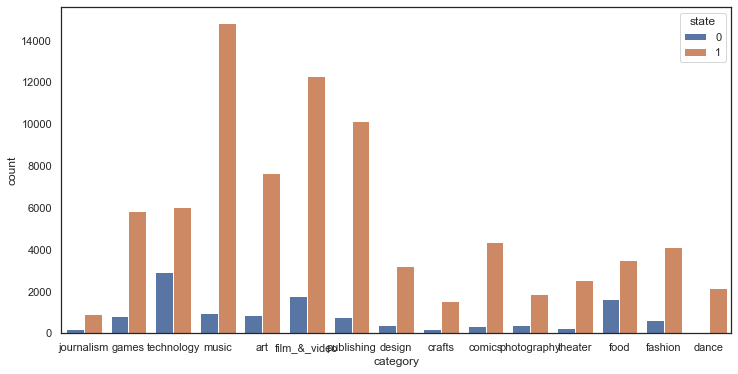

In [1108]:
# Countplot
plt.figure(figsize=(12,6))
sns.countplot(x="category", hue="state", data=data_clean);

In [1109]:
# Plot FacetGrid
#g = sns.FacetGrid(data_clean,
#                  col='view',
#                  row='bedrooms',
#                  hue='waterfront',
#                  palette='Set2')
#g = (g.map(plt.scatter, 'sqft_living', 'price').add_legend())

In [1110]:
# Plot continuous variables
#plt.hist(data_clean.price, bins = 25);
#plt.hist(np.log(data_clean.price), bins = 25);
#plt.tight_layout()

In [1111]:
# Plot skewed features (OPTIMIZE - HOW?)

In [1112]:
# Plot categorical variables
#sns.stripplot(x=data_clean.condition.values, y = data_clean.price.values, 
#              jitter=0.1, alpha=0.5);

#sns.stripplot(x=data_clean.grade.values, y = data_clean.price.values,
#              jitter=0.1, alpha=0.5);

#sns.stripplot(x=data_clean.zipcode.values, y = data_clean.price.values,
#              jitter=0.1, alpha=0.5);

#sns.pointplot(x = data_clean.zipcode.values, y = data_clean.price.values,
#              order = data_clean.groupby("zipcode")["price"].mean().sort_values().index);

#plt.tight_layout()

# Feature Engineering
Purpose: Select important features and construct more meaningful ones using the raw data that you have

To-Do's:
- Start with brainstorming session to determine which features could be useful

In [1131]:
# Import libraries
from sklearn.utils import shuffle

In [1382]:
# Reset dataset to post-clean state (optional)
data = data_clean.copy()

In [1523]:
data_clean.usd_pledged.mean()

21719.29481348647

In [1522]:
data_clean.groupby("category")["usd_pledged"].mean()

category
art              8335.288066
comics          11737.559555
crafts           8391.065425
dance            5724.534043
design          50304.686032
fashion         22281.911830
film_&_video    17019.432439
food            16076.851614
games           50595.817195
journalism      13423.648927
music            7880.700043
photography     13672.817427
publishing      10612.013381
technology      69223.084251
theater          7319.670720
Name: usd_pledged, dtype: float64

In [1525]:
data_clean.groupby("launched_at_yr")["usd_pledged"].sum()

launched_at_yr
2009    7.919319e+05
2010    6.303499e+06
2011    2.270295e+07
2012    7.637463e+07
2013    1.890221e+08
2014    2.462882e+08
2015    3.379637e+08
2016    2.871128e+08
2017    3.012610e+08
2018    5.132929e+08
2019    5.020504e+07
Name: usd_pledged, dtype: float64

In [1384]:
# Post-exploration drop of columns
data.drop(["deadline_cont", "deadline_yr", "launched_at_yr", "profile_state", "spotlight"], axis=1, inplace=True)

In [1385]:
# Create avg backing feature (usd_pledged / backers_count)
data["usd_pledged_avg"] = data["usd_pledged"] / data["backers_count"]

In [1386]:
# Create over- or underperformance in % through "usd_pledged" / "goal_converted"
data["pledged_goal_ratio"] = data.usd_pledged / data.goal_converted * 100

In [1387]:
# Create "creator_project_no" from "creator_id" and "launched_at" (to see whether there are learning effects) --> Sorting has been done at the end of Data Cleaning
def count_project_no(data, column):
    id_list = []
    project_count = []
    for el in data[column]:
        id_list.append(el)
        project_count.append(id_list.count(el))
    return project_count

data["creator_project_no"] = count_project_no(data, "creator_id")

In [1388]:
# Create "creator_mult_projects" (1/0) to mark whether creator has previously started a project (1)
data["creator_mult_projects"] = [0 if el==1 else 1 for el in data.creator_project_no]

In [1389]:
# Make buckets for projects (e.g. 501-5000 "low_range", 5001-50000 "mid_range", ...) --> FUTURE WORK

In [1390]:
# Create log "usd_pledged_log" for continuous variable "usd_pledged"
data["usd_pledged_log"] = [math.log(el) for el in data["usd_pledged"]]

In [1391]:
# Create log "goal_converted_log" for continuous variable "goal_converted"
data["goal_converted_log"] = [math.log(el) for el in data["goal_converted"]]

In [1392]:
# Create log "backers_count_log" for continuous variable "backers_count"
data["backers_count_log"] = [math.log(el) for el in data["backers_count"]]

In [1393]:
# Display histogram of log-transformed features
#data['usd_pledged_log'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black');
#data['goal_converted_log'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black');
#data['backers_count_log'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black');

In [1394]:
# Split 2nd dataset "data_reg" for regression on "usd_pledged_log"
data_reg = data.copy()

In [1395]:
# Drop features for classification "state" ("data")
data.drop(["backers_count", "backers_count_log", "category_sub", "pledged_goal_ratio",
           "creator_project_no",  "deadline", "staff_pick", "usd_pledged_avg",
           "goal_converted", "launched_at", "usd_pledged", "usd_pledged_log"], axis=1, inplace=True)

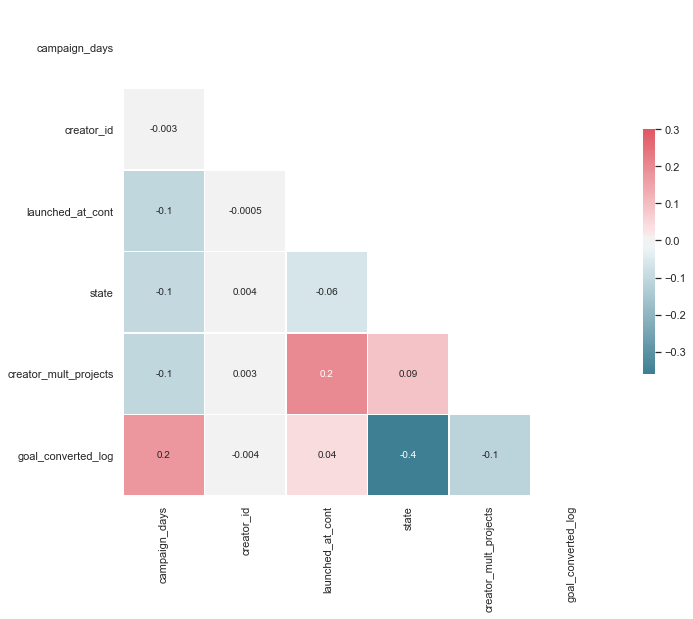

In [1396]:
# Plot correlation heatmap for continuous variables
#Generate a mask for the upper triangle
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))

#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

#Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".1g");

In [1397]:
# Drop features for regression "usd_pledged_log" ("data_reg")
data_reg.drop(["backers_count", "backers_count_log", "category", "pledged_goal_ratio", 
               "creator_project_no", "deadline", "staff_pick", "usd_pledged_avg",
           "goal_converted", "goal_converted_log", "launched_at", "usd_pledged"], axis=1, inplace=True)

# Preprocessing (Train/Test Split and Pipeline)

In [1398]:
# Import libraries
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline, make_pipeline # Same, but with the latter it is not necessary to name estimator and transformer
#from imblearn.pipeline import Pipeline as Imb_Pipe
from sklearn.compose import ColumnTransformer

## Train/test and preprocessing (full dataset)

**Train/test split classification ("state")**

In [1399]:
data_full = data.copy()

In [1400]:
# Define predictors and target variable
X = data_full.drop(["state"], axis=1)
y = data_full["state"]

In [1401]:
# Split data into training and testing sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X,y,test_size=test_size,
                                                        random_state=random_state,
                                                        shuffle=True,
                                                   stratify=y) # Use stratify=y if labels are inbalanced (e.g. most wines are 5 or 6; check with value_counts()!)

**Remove outliers (with high ratio of usd_pledged to goal_converted**

In [1402]:
data_full = pd.concat([X_train_full, y_train_full], axis=1)

In [1403]:
# Remove all creators with more than 5 remaining entries (to reduce weighted impact) (1/2)
data_full = shuffle(data_full, random_state=random_state)

def count_over_five(data, column):
    id_list = []
    project_count = []
    for el in data[column]:
        id_list.append(el)
        if id_list.count(el) <= 5:
            project_count.append(0)            
        else:
            project_count.append(1)
    return project_count

data_full["creator_over_five"] = count_over_five(data_full, "creator_id")

In [1404]:
# Remove all creators with more than 5 remaining entries (to reduce weighted impact) (2/2)
data_full = data_full[data_full.creator_over_five==0]
data_full = data_full.drop(["creator_over_five"], axis=1)

In [1405]:
#data_full = data_full[data_full.pledged_goal_ratio < 10000].copy()

In [1406]:
data_full = data_full.drop(["creator_id"], axis=1)

In [1407]:
# Reassign X_train and y_train after sampling
X_train_full = data_full.drop(["state"], axis=1)
y_train_full = data_full["state"]
X_test_full = X_test_full.drop(["creator_id"], axis=1)

**Dummy classifier (to establish baseline)**

In [1408]:
# Dummy classifier (requires train/test split)
dum_clf = DummyClassifier(strategy='most_frequent').fit(X_train_full,y_train_full)
y_pred_dum_clf = dum_clf.predict(X_test_full)

#Distribution of y test
print('y actual : \n' +  str(y_test_full.value_counts()))

#Distribution of y predicted
print('y predicted : \n' + str(pd.Series(y_pred_dum_clf).value_counts()))

y actual : 
1    24351
0     3707
Name: state, dtype: int64
y predicted : 
1    28058
dtype: int64


**Pipeline for imputing and scaling numerical and categorical features (classifcation)**

In [1409]:
# Creating list for categorical predictors/features (used in "Scaling with Preprocessing Pipeline") 
cat_features = list(data_full.columns[data_full.dtypes==object])
cat_features

['category', 'country']

In [1410]:
# Creating list for numerical predictors/features (removing target column, used in "Scaling with Preprocessing Pipeline")
num_features = list(data_full.columns[data_full.dtypes!=object])
num_features.remove('state')
num_features

['campaign_days',
 'launched_at_cont',
 'creator_mult_projects',
 'goal_converted_log']

In [1411]:
# Pipeline using Pipeline
# Pipeline for numerical features
num_pipeline = Pipeline([
    ('imputer_num', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

# Pipeline for categorical features 
cat_pipeline = Pipeline([
    ('imputer_cat', SimpleImputer(strategy='constant', fill_value='missing')),
    ('1hot', OneHotEncoder(handle_unknown='ignore'))
])

# Complete pipeline
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

In [1412]:
# Saving preprocessed X_train and X_test
X_train_prep_full = preprocessor.fit_transform(X_train_full)
X_test_prep_full = preprocessor.transform(X_test_full)

## Train/test and preprocessing (balanced dataset)

**Train/test split classification ("state") - balanced**

In [1470]:
# Define predictors and target variable
data_bal = data.copy()

In [1471]:
# Define predictors and target variable
X_bal = data_bal.drop(["state"], axis=1)
y_bal = data_bal["state"]

In [1472]:
# Split data into training and testing sets
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal,y_bal,test_size=test_size,
                                                        random_state=random_state,
                                                        shuffle=True,
                                                                   stratify=y_bal) # Use stratify=Y if labels are inbalanced (e.g. most wines are 5 or 6; check with value_counts()!)

In [1473]:
data_bal = pd.concat([X_train_bal, y_train_bal], axis=1)

In [1474]:
# Reduce occurrences of "successful" for a more balanced dataset (OPTIONAL)
data_majority_bal = shuffle(data_bal[data.state==1], random_state=random_state)
data_minority_bal = shuffle(data_bal[data.state==0], random_state=random_state)
data_bal['state'].value_counts()

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



1    56819
0     8649
Name: state, dtype: int64

In [1475]:
# sample with replacement to match majority class and get reproducible results
data_upsampled_bal = resample(data_minority_bal, 
                                 replace=True,     
                                 n_samples=round(len(data_minority_bal.index)*2),    
                                 random_state=random_state)

data_downsampled_bal = resample(data_majority_bal, 
                                 replace=True,     
                                 n_samples=round(len(data_majority_bal.index)/2),    
                                 random_state=random_state)

data_bal = pd.concat([data_upsampled_bal, data_downsampled_bal], axis=0)

# Display new class counts
data_bal.state.value_counts()

1    28410
0    17298
Name: state, dtype: int64

In [1476]:
# Remove all creators with more than 5 remaining entries (to reduce weighted impact) (1/2)
#data_bal = shuffle(data_bal, random_state=random_state)

#data_bal["creator_over_five"] = count_over_five(data_bal, "creator_id")

In [1477]:
# Remove all creators with more than 5 remaining entries (to reduce weighted impact) (2/2)
#data_bal = data_bal[data_bal.creator_over_five==0]
#data_bal = data_bal.drop(["creator_over_five"], axis=1)

In [1478]:
data_bal = data_bal.drop(["creator_id"], axis=1)

In [1479]:
# Reassign X_train and y_train after sampling
X_train_bal = data_bal.drop(["state"], axis=1)
y_train_bal = data_bal["state"]
X_test_bal = X_test_bal.drop(["creator_id"], axis=1)

**Pipeline for imputing and scaling numerical and categorical features (classifcation) - balanced**

In [1480]:
# Creating list for categorical predictors/features (used in "Scaling with Preprocessing Pipeline") 
cat_features_red = list(data_bal.columns[data_bal.dtypes==object])
cat_features_red

['category', 'country']

In [1481]:
# Creating list for numerical predictors/features (removing target column, used in "Scaling with Preprocessing Pipeline")
num_features_red = list(data_bal.columns[data_bal.dtypes!=object])
num_features_red.remove('state')
num_features_red

['campaign_days',
 'launched_at_cont',
 'creator_mult_projects',
 'goal_converted_log']

In [1482]:
# Pipeline using Pipeline
# Pipeline for numerical features
num_pipeline_red = Pipeline([
    ('imputer_num', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

# Pipeline for categorical features 
cat_pipeline_red = Pipeline([
    ('imputer_cat', SimpleImputer(strategy='constant', fill_value='missing')),
    ('1hot', OneHotEncoder(handle_unknown='ignore'))
])

# Complete pipeline
preprocessor_red = ColumnTransformer([
    ('num', num_pipeline_red, num_features_red),
    ('cat', cat_pipeline_red, cat_features_red)
])

In [1483]:
# Saving preprocessed X_train and X_test
X_train_prep_bal = preprocessor_red.fit_transform(X_train_bal)
X_test_prep_bal = preprocessor_red.transform(X_test_bal)

## Train/test and preprocessing (reduced dataset)

**Train/test split classification ("state") - reduced**

In [1425]:
# Define predictors and target variable
data_red = data.copy()

In [1426]:
# Sample n_reduced rows out of data_red dataset
data_red = data_red.sample(n=n_reduced, random_state=random_state)
print(data_red.state.value_counts())

1    4320
0     680
Name: state, dtype: int64


In [1427]:
# Define predictors and target variable
X_red = data_red.drop(["state"], axis=1)
y_red = data_red["state"]

In [1428]:
# Split data into training and testing sets
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red,y_red,test_size=test_size,
                                                        random_state=random_state,
                                                        shuffle=True,
                                                                   stratify=y_red) # Use stratify=Y if labels are inbalanced (e.g. most wines are 5 or 6; check with value_counts()!)

In [1429]:
data_red = pd.concat([X_train_red, y_train_red], axis=1)

In [1430]:
# Reduce occurrences of "successful" for a more balanced dataset (OPTIONAL)
data_majority_red = shuffle(data_red[data.state==1], random_state=random_state)
data_minority_red = shuffle(data_red[data.state==0], random_state=random_state)
data_red['state'].value_counts()

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



1    3024
0     476
Name: state, dtype: int64

In [1431]:
# sample with replacement to match majority class and get reproducible results
data_upsampled_red = resample(data_minority_red, 
                                 replace=True,     
                                 n_samples=round(len(data_minority_red.index))*2,    
                                 random_state=random_state)

data_downsampled_red = resample(data_majority_red, 
                                 replace=True,     
                                 n_samples=round(len(data_majority_red.index)/2),    
                                 random_state=random_state)

data_red = pd.concat([data_upsampled_red, data_downsampled_red], axis=0)

# Display new class counts
data_red.state.value_counts()

1    1512
0     952
Name: state, dtype: int64

In [1432]:
data_red = data_red.drop(["creator_id"], axis=1)

In [1433]:
# Define predictors and target variable
X_train_red = data_red.drop(["state"], axis=1)
y_train_red = data_red["state"]
X_test_red = X_test_red.drop(["creator_id"], axis=1)

**Pipeline for imputing and scaling numerical and categorical features (classifcation) - reduced**

In [1434]:
# Creating list for categorical predictors/features (used in "Scaling with Preprocessing Pipeline") 
cat_features_red = list(data_red.columns[data_red.dtypes==object])
cat_features_red

['category', 'country']

In [1435]:
# Creating list for numerical predictors/features (removing target column, used in "Scaling with Preprocessing Pipeline")
num_features_red = list(data_red.columns[data_red.dtypes!=object])
num_features_red.remove('state')
num_features_red

['campaign_days',
 'launched_at_cont',
 'creator_mult_projects',
 'goal_converted_log']

In [1436]:
# Pipeline using Pipeline
# Pipeline for numerical features
num_pipeline_red = Pipeline([
    ('imputer_num', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

# Pipeline for categorical features 
cat_pipeline_red = Pipeline([
    ('imputer_cat', SimpleImputer(strategy='constant', fill_value='missing')),
    ('1hot', OneHotEncoder(handle_unknown='ignore'))
])

# Complete pipeline
preprocessor_red = ColumnTransformer([
    ('num', num_pipeline_red, num_features_red),
    ('cat', cat_pipeline_red, cat_features_red)
])

In [1437]:
# Saving preprocessed X_train and X_test
X_train_prep_red = preprocessor_red.fit_transform(X_train_red)
X_test_prep_red = preprocessor_red.transform(X_test_red)

**Define "select_dataset" function**

In [1438]:
# Define function to select dataset for each individual model
def select_dataset_clf(key):
    if key == "full":
        X_train = X_train_full
        X_test = X_test_full
        y_train = y_train_full
        y_test = y_test_full
        X_train_prep = X_train_prep_full
        X_test_prep = X_test_prep_full
    elif key == "balanced":
        X_train = X_train_bal
        X_test = X_test_bal
        y_train = y_train_bal
        y_test = y_test_bal
        X_train_prep = X_train_prep_bal
        X_test_prep = X_test_prep_bal
    elif key == "reduced":
        X_train = X_train_red
        X_test = X_test_red
        y_train = y_train_red
        y_test = y_test_red
        X_train_prep = X_train_prep_red
        X_test_prep = X_test_prep_red
    else:
        print("Please enter valid key")
    print(f"You are currently working with the {key} dataset")
    return X_train, X_test, y_train, y_test, X_train_prep, X_test_prep

# Predictive Modeling: Classification ("state")
Purpose: Train machine learning models (supervised learning), evaluate their performance and use them to make predictions

In [1439]:
# Import libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_predict, cross_val_score, cross_validate, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score, confusion_matrix, f1_score, precision_recall_curve, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.base import clone
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
from xgboost import XGBClassifier
import statsmodels.api as sm

## LogReg (with GridSearch)

In [1484]:
# Select dataset ("full", "balanced", "reduced") - SELECT BEFORE RUNNING MODEL
dataset = "balanced"
X_train, X_test, y_train, y_test, X_train_prep, X_test_prep = select_dataset_clf(dataset)

You are currently working with the balanced dataset


In [1485]:
# Test whether select_dataset_clf is working correctly
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
print(X_train.columns)
print(X_test.columns)

45708
28058
45708
28058
Index(['campaign_days', 'category', 'country', 'launched_at_cont',
       'creator_mult_projects', 'goal_converted_log'],
      dtype='object')
Index(['campaign_days', 'category', 'country', 'launched_at_cont',
       'creator_mult_projects', 'goal_converted_log'],
      dtype='object')


**Apply logistic regression**

In [1486]:
# Logistic regression (using pipeline)
pipeline_logreg = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000))
])

In [1487]:
# Logistic regression (using pipeline, making predictions using cross validation and probabilities)
y_train_pred_logreg = cross_val_predict(pipeline_logreg, X_train, y_train, cv=5)

In [1488]:
# Logistic regression (using pipeline, printing results)
print('Cross validation scores:')
print('-------------------------')
print("Accuracy: {:.2f}".format(accuracy_score(y_train, y_train_pred_logreg)))
print("Recall: {:.2f}".format(recall_score(y_train, y_train_pred_logreg)))
print("Precision: {:.2f}".format(precision_score(y_train, y_train_pred_logreg)))
print("F1 Score: {:.2f}".format(f1_score(y_train, y_train_pred_logreg)))
print("Confusion Matrix: \n" + str(confusion_matrix(y_train, y_train_pred_logreg)))

Cross validation scores:
-------------------------
Accuracy: 0.75
Recall: 0.84
Precision: 0.77
F1 Score: 0.81
Confusion Matrix: 
[[10267  7031]
 [ 4517 23893]]


**Grid Search (Pipeline)**

In [1377]:
# Defining hyperparameters for grid-search (C initial: [0.01, 0.1, 1, 10, 100]; adapted according to optimal results)
param_logreg = {'logreg__penalty':('l1','l2'),
                'logreg__C': [0.05, 0.08, 0.1, 0.2, 0.5, 1],
                'logreg__class_weight': [{0: x, 1: 1.0-x} for x in [0.25,0.5,0.75]]
               }

grid_logreg = GridSearchCV(pipeline_logreg, param_grid=param_logreg, cv=5, scoring="f1_micro", 
                           verbose=5, n_jobs=-1) # scoring can also be "precision", "recall", ...

In [1378]:
# Fit model
grid_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   41.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer_num',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                

In [1379]:
# Show best parameters
print('Best score:\n{:.2f}'.format(grid_logreg.best_score_))
print("Best parameters:\n{}".format(grid_logreg.best_params_))

Best score:
1.00
Best parameters:
{'logreg__C': 1, 'logreg__class_weight': {0: 0.75, 1: 0.25}, 'logreg__penalty': 'l2'}


In [1380]:
# Save best model as best_model
best_model_logreg = grid_logreg.best_estimator_['logreg']

**Final Evaluation**

In [1381]:
# Calculating the accuracy, recall and precision for the test set with the optimized model
y_pred_logreg = best_model_logreg.predict(X_test_prep)

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_logreg)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred_logreg)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred_logreg)))
print("F1 Score: {:.2f}".format(f1_score(y_test, y_pred_logreg)))
print("Confusion Matrix: \n" + str(confusion_matrix(y_test, y_pred_logreg)))

Accuracy: 1.00
Recall: 1.00
Precision: 1.00
F1 Score: 1.00
Confusion Matrix: 
[[ 3615    92]
 [    0 24351]]


## KNeighbors Classifier

In [1013]:
# Select dataset ("full", "balanced", "reduced") - SELECT BEFORE RUNNING MODEL
dataset = "reduced"
X_train, X_test, y_train, y_test, X_train_prep, X_test_prep = select_dataset_clf(dataset)

You are currently working with the reduced dataset


**Apply KNeighborsClassifier**

In [1014]:
# Logistic regression (using pipeline)
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])

**Grid Search (Pipeline)**

In [1015]:
# Defining hyperparameter space for grid-search
param_knn = {'knn__leaf_size': list(range(1,50)),
             'knn__n_neighbors': list(range(1,30))}

grid_knn = GridSearchCV(pipeline_knn, param_grid=param_knn, cv=5, scoring=scoring, 
                           verbose=4, n_jobs=-1) # scoring can also be "precision", "recall", ...

In [1016]:
# Fit model
grid_knn.fit(X_train, y_train)

Fitting 5 folds for each of 1421 candidates, totalling 7105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 294 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 1078 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 1616 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 2254 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2988 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3822 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4752 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 5782 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 6908 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 7098 out of 7105 | elapsed:  3.2min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 7105 out of 7105 | elapsed:  3.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer_num',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                

In [1017]:
# Show best parameters
print('Best score:\n{:.2f}'.format(grid_knn.best_score_))
print("Best parameters:\n{}".format(grid_knn.best_params_))

Best score:
0.90
Best parameters:
{'knn__leaf_size': 1, 'knn__n_neighbors': 2}


In [1018]:
# Save best model as best_model
best_model_knn = grid_knn.best_estimator_['knn']

**Final Evaluation**

In [1019]:
# Calculating the accuracy, recall and precision for the test set with the optimized model
y_pred_knn = best_model_knn.predict(X_test_prep)

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_knn)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred_knn)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred_knn)))
print("F1 Score: {:.2f}".format(f1_score(y_test, y_pred_knn)))
print("Confusion Matrix: \n" + str(confusion_matrix(y_test, y_pred_knn)))

Accuracy: 0.70
Recall: 0.72
Precision: 0.92
F1 Score: 0.81
Confusion Matrix: 
[[121  83]
 [361 935]]


## Random Forest Classifier

In [737]:
# Select dataset ("full", "balanced", "reduced") - SELECT BEFORE RUNNING MODEL
dataset = "reduced"
X_train, X_test, y_train, y_test, X_train_prep, X_test_prep = select_dataset_clf(dataset)

You are currently working with the reduced dataset


**Apply Random Forest Classifier**

In [738]:
# Create model
pipeline_rf_clf = Pipeline([
    ('preprocessor', preprocessor),
    ('rf_clf', RandomForestClassifier(n_estimators=100,
                              random_state=random_state,
                              max_depth=5,
                              max_features="sqrt",
                              n_jobs=-1))
])

In [739]:
y_train_pred_rf_clf = cross_val_predict(pipeline_rf_clf, X_train, y_train, cv=5)

In [740]:
print('Cross validation scores:')
print('-------------------------')
print("Accuracy: {:.2f}".format(accuracy_score(y_train, y_train_pred_rf_clf)))
print("Recall: {:.2f}".format(recall_score(y_train, y_train_pred_rf_clf)))
print("Precision: {:.2f}".format(precision_score(y_train, y_train_pred_rf_clf)))
print("F1 Score: {:.2f}".format(f1_score(y_train, y_train_pred_rf_clf)))
print("Confusion Matrix: \n" + str(confusion_matrix(y_train, y_train_pred_rf_clf)))

Cross validation scores:
-------------------------
Accuracy: 0.86
Recall: 1.00
Precision: 0.86
F1 Score: 0.93
Confusion Matrix: 
[[   1  475]
 [   0 3024]]


In [741]:
# Defining hyperparameter space for grid-search
param_grid = {'rf_clf__bootstrap': [True, False],
              'rf_clf__max_depth': [2, 3, 5, 10, 20, None],
              'rf_clf__max_features': ['auto', 'sqrt'],
              'rf_clf__min_samples_leaf': [1, 2, 4],
              'rf_clf__min_samples_split': [2, 5, 10],
              'rf_clf__n_estimators': [10, 50, 100, 200, 400]} # Others: kernel, degree (only for poly)
grid_rf_clf = GridSearchCV(pipeline_rf_clf, param_grid, cv=5, scoring=scoring, 
                           verbose=4, n_jobs=-1)

In [742]:
# Fit on training data
grid_rf_clf.fit(X_train, y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1193 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 2957 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 3520 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 4133 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 4794 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | e

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer_num',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                

In [743]:
# Show best parameters
print('Best score:\n{:.2f}'.format(grid_rf_clf.best_score_))
print("Best parameters:\n{}".format(grid_rf_clf.best_params_))

Best score:
0.84
Best parameters:
{'rf_clf__bootstrap': True, 'rf_clf__max_depth': 20, 'rf_clf__max_features': 'auto', 'rf_clf__min_samples_leaf': 2, 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 400}


In [744]:
# Save best model as best_model
best_model_rf_clf = grid_rf_clf.best_estimator_['rf_clf']

**Final Evaluation**

In [745]:
y_pred_rf_clf = best_model_rf_clf.predict(X_test_prep)

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_rf_clf)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred_rf_clf)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred_rf_clf)))
print("F1 Score: {:.2f}".format(f1_score(y_test, y_pred_rf_clf)))
print("Confusion Matrix: \n" + str(confusion_matrix(y_test, y_pred_rf_clf)))

Accuracy: 0.88
Recall: 0.98
Precision: 0.88
F1 Score: 0.93
Confusion Matrix: 
[[  37  167]
 [  20 1276]]


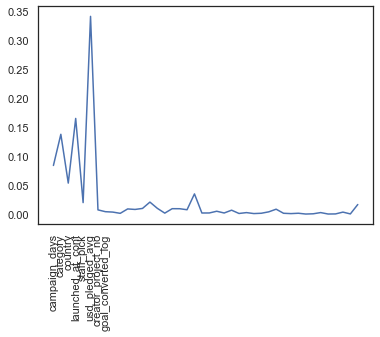

In [746]:
plt.plot(best_model_rf_clf.feature_importances_)
plt.xticks(np.arange(X_train.shape[1]), X_train.columns.tolist(), rotation=90);

In [747]:
list(zip(X_train_red, best_model_rf_clf.feature_importances_))

[('campaign_days', 0.08392571239366203),
 ('category', 0.13775152175251718),
 ('country', 0.0534920853809838),
 ('launched_at_cont', 0.16515368019057888),
 ('staff_pick', 0.0197925905219967),
 ('usd_pledged_avg', 0.3413869180282465),
 ('creator_project_no', 0.007249414802896279),
 ('goal_converted_log', 0.004128979630816863)]

## Support Vector Classifier

In [ ]:
# Select dataset ("full", "balanced", "reduced") - SELECT BEFORE RUNNING MODEL
dataset = "reduced"
X_train, X_test, y_train, y_test, X_train_prep, X_test_prep = select_dataset_clf(dataset)

**Apply Support Vector Classifier**

In [353]:
# Kernel SVC (radial basis function)
pipeline_svc = Pipeline([
    ('preprocessor', preprocessor_red),
    ('svc', SVC(kernel='rbf', C=1E6))
])
#svc_clf_rbf = SVC(kernel='rbf', C=1E6)
#svc_clf_rbf.fit(X_train_prep_red, y_train_red)

In [354]:
# Tune model with GridSearchCV (find optimal C)
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005],
             'svc__kernel': ["linear", "rbf", "poly"]} # Others: kernel, degree (only for poly)
grid_svc = GridSearchCV(pipeline_svc, param_grid, cv=5, scoring=scoring, 
                           verbose=4, n_jobs=-1)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s


CPU times: user 465 ms, sys: 18.2 ms, total: 483 ms
Wall time: 1.75 s


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer_num',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                

In [ ]:
# Fit on training data
%time grid_svc.fit(X_train, y_train)
#print(grid.best_params_)

In [ ]:
# Show best parameters
print('Best score:\n{:.2f}'.format(grid_svc.best_score_))
print("Best parameters:\n{}".format(grid_svc.best_params_))

In [ ]:
# Save best model as best_model
best_model_svc = grid_svc.best_estimator_['rf_clf']

**Final Evaluation**

In [357]:
y_pred_svc_clf = best_model_svc.predict(X_test_prep)

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_svc_clf)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred_svc_clf)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred_svc_clf)))
print("F1 Score: {:.2f}".format(f1_score(y_test, y_pred_svc_clf)))
print("Confusion Matrix: \n" + str(confusion_matrix(y_test, y_pred_svc_clf)))

Accuracy: 0.86
Recall: 1.00
Precision: 0.86
F1 Score: 0.93
Confusion Matrix: 
[[   4  190]
 [   2 1204]]


## AdaBoost

In [ ]:
# Select dataset ("full", "balanced", "reduced") - SELECT BEFORE RUNNING MODEL
dataset = "reduced"
X_train, X_test, y_train, y_test, X_train_prep, X_test_prep = select_dataset_clf(dataset)

**Feature importance with AdaBoost**

In [466]:
# Train a supervised learning model that has 'feature_importances_'
pipeline_ada_clf = Pipeline([
    ('preprocessor', preprocessor),
    ('ada_clf', AdaBoostClassifier())
])
    
pipeline_ada_clf.fit(X_train,y_train)

In [472]:
# Make new predictions (is this correct? X_test instead of X_test_prep?)
y_pred_ada_clf = pipeline_ada_clf.predict(X_test)

# Report scores from the final model using both versions of data
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_ada_clf)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred_ada_clf)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred_ada_clf)))
print("F1 Score: {:.2f}".format(f1_score(y_test, y_pred_ada_clf)))
print("Confusion Matrix: \n" + str(confusion_matrix(y_test, y_pred_ada_clf)))

Accuracy: 0.88
Recall: 0.98
Precision: 0.90
F1 Score: 0.94
Confusion Matrix: 
[[  667  1804]
 [  348 15887]]


## XGBoost

In [601]:
# Select dataset ("full", "balanced", "reduced") - SELECT BEFORE RUNNING MODEL
dataset = "balanced"
X_train, X_test, y_train, y_test, X_train_prep, X_test_prep = select_dataset_clf(dataset)

You are currently working with the balanced dataset


In [476]:
# Get columns list for categorical and numerical
categorical_features = df.select_dtypes('object').columns.tolist()
numerical_features = df.select_dtypes('int64').columns.tolist()
# Create a pipeline
pipeline_xgb_clf = Pipeline([
  ('preprocessor', preprocessor),
  ('fs', SelectKBest()),
  ('xgb_clf', XGBClassifier(objective='binary:logistic'))
])

In [479]:
# Define our search space for grid search
params_xgb_clf = [
  {
    'xgb_clf__n_estimators': [50, 100, 150, 200],
    'xgb_clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'xgb_clf__max_depth': range(3, 10),
    'xgb_clf__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'xgb_clf__gamma': [i/10.0 for i in range(3)],
    'fs__score_func': [chi2],
    'fs__k': [10],
  }
]
# Define cross validation
kfold = KFold(n_splits=10, shuffle=True, random_state=random_state)
# AUC and accuracy as score
#scoring = {'AUC':'roc_auc', 'Accuracy':make_scorer(accuracy_score)}
# Define grid search
grid_xgb_clf = GridSearchCV(
  pipeline_xgb_clf,
  param_grid=params_xgb_clf,
  cv=kfold,
  scoring=scoring,
  refit='AUC',
  verbose=2,
  n_jobs=-1
)
# Fit grid search
xgb_clf = grid_xgb_clf.fit(X_train, y_train)

Fitting 10 folds for each of 672 candidates, totalling 6720 fits


/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]:

ValueError: Input X must be non-negative.

In [ ]:
print(xgb_clf.best_params_)

In [ ]:
# Predict values
y_pred_xgb_clf = xgb_clf.predict(X_test)
print('Best AUC Score: {}'.format(xgb_clf.best_score_))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred_xgb_clf)))
print(confusion_matrix(y_test,y_pred_xgb_clf))

## Ensemble Test Multiple Models

In [708]:
# Select dataset ("full", "balanced", "reduced") - SELECT BEFORE RUNNING MODEL
dataset = "reduced"
X_train, X_test, y_train, y_test, X_train_prep, X_test_prep = select_dataset_clf(dataset)

You are currently working with the reduced dataset


**Apply Ensemble**

In [709]:
# Define classifiers and run code
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    #NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
    ]
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))
    y_pred_pipe = pipe.predict(X_test)
    print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_pipe)))
    print("Recall: {:.2f}".format(recall_score(y_test, y_pred_pipe)))
    print("Precision: {:.2f}".format(precision_score(y_test, y_pred_pipe)))
    print("F1 Score: {:.2f}".format(f1_score(y_test, y_pred_pipe)))
    print("Confusion Matrix: \n" + str(confusion_matrix(y_test, y_pred_pipe)))
    print("\n")

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
model score: 0.857
Accuracy: 0.86
Recall: 0.95
Precision: 0.89
F1 Score: 0.92
Confusion Matrix: 
[[  56  148]
 [  67 1229]]


SVC(C=0.025, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
model score: 0.864
Accuracy: 0.86
Recall: 1.00
Precision: 0.86
F1 Score: 0.93
Confusion Matrix: 
[[   0  204]
 [   0 1296]]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                 

## Optimization: RandomizedSearchCV (alt. to GridSearchCV), here: Random Forest

In [ ]:
# Fit optimized RandomForestClassifier

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state=random_state)

# Create the random search model
rs_rf_clf = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=random_state)

# Fit 
rs_rf_clf.fit(X_train, y_train)

In [ ]:
# Display best parameters
rs_rf_clf.best_params_

In [ ]:
# Use best model for predictions
best_model = rs.best_estimator_

y_train_pred = best_model.predict(train)
y_train_proba = best_model.predict_proba(train)[:, 1]

y_test_pred = best_model.predict(test)
y_test_proba = best_model.predict_proba(test)[:, 1]

## Optimization: Training and Predicting Pipeline

In [ ]:
# Define function for train_predict
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm/classifier to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,0.5)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [ ]:
# Set classifiers (if applicable)
clf_A = DecisionTreeClassifier(random_state=101)
clf_B = SVC(random_state = 101)
clf_C = AdaBoostClassifier(random_state = 101)

In [ ]:
# Set sample sizes
samples_1 = int(round(len(X_train) / 100))
samples_10 = int(round(len(X_train) / 10))
samples_100 = len(X_train)

In [ ]:
# Collect results for various sample sizes
results = {}
for clf in [clf_A, clf_B, clf_C]: # Define which classifiers shall be used
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Predictive Modeling: Regression ("usd_pledged")
Purpose: Train machine learning models (supervised learning), evaluate their performance and use them to make predictions

In [ ]:
# Import libraries
from scipy.sparse import csr_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RANSACRegressor

## Train/test split and preprocessing pipeline

**Train/test split regression ("usd_pledged_log")**

In [230]:
# Define predictors and target variable
X_reg = data_reg.drop(["usd_pledged_log"], axis=1)
y_reg = data_reg["usd_pledged_log"]

In [365]:
# Split data into training and testing sets
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg,y_reg,test_size=test_size,
                                                        random_state=random_state,
                                                        shuffle=True) # Use stratify=Y if labels are inbalanced (e.g. most wines are 5 or 6; check with value_counts()!)

**Pipeline for imputing and scaling numerical and categorical features (regression)**

In [237]:
# Creating list for categorical predictors/features (used in "Scaling with Preprocessing Pipeline") 
cat_features_reg = list(data_reg.columns[data_reg.dtypes==object])
cat_features_reg

['category_sub', 'country']

In [238]:
# Creating list for numerical predictors/features (removing target column, used in "Scaling with Preprocessing Pipeline")
num_features_reg = list(data_reg.columns[data_reg.dtypes!=object])
num_features_reg.remove('usd_pledged_log')
num_features_reg

['campaign_days',
 'launched_at_cont',
 'staff_pick',
 'state',
 'usd_pledged_avg',
 'creator_project_no']

In [239]:
# Pipeline using Pipeline
# Pipeline for numerical features
num_pipeline_reg = Pipeline([
    ('imputer_num', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

# Pipeline for categorical features 
cat_pipeline_reg = Pipeline([
    ('imputer_cat', SimpleImputer(strategy='constant', fill_value='missing')),
    ('1hot', OneHotEncoder(handle_unknown='ignore'))
])

# Complete pipeline
preprocessor_reg = ColumnTransformer([
    ('num', num_pipeline_reg, num_features_reg),
    ('cat', cat_pipeline_reg, cat_features_reg)
])

In [450]:
# Saving preprocessed X_reg_train and X_reg_test
X_reg_train_prep = preprocessor_reg.fit_transform(X_reg_train)
X_reg_test_prep = preprocessor_reg.transform(X_reg_test)

## Linear regression (OLS)

**Apply linear regression**

In [ ]:
X_reg_train_prep2 = X_reg_train_prep.toarray()
X_reg_train_prep2 = sm.add_constant(X_reg_train_prep2)

In [ ]:
y_reg_train2 = np.asarray(y_reg_train)

In [ ]:
reg_ols = sm.OLS(y_reg_train2, X_reg_train_prep2).fit()

In [ ]:
reg_ols.summary()

## Linear regression (Scikit Learn)

**Apply linear regression**

In [ ]:
# Initiate and fit model
reg_lr = LinearRegression()
reg_lr.fit(X_reg_train_prep, y_reg_train)

In [ ]:
# Predict target
y_pred_reg_lr = reg_lr.predict(X_reg_test_prep)

In [ ]:
# Plot errors
plt.scatter(y_reg_test, y_pred_reg_lr)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
print('MAE:', metrics.mean_absolute_error(y_reg_test, y_pred_reg_lr))
print('MSE:', metrics.mean_squared_error(y_reg_test, y_pred_reg_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_reg_test, y_pred_reg_lr)))
print(r2_score(y_reg_test, y_pred_reg_lr))

**Final evaluation**

In [ ]:
# Transform predictions to real values (exp)
reg_lr_pred = pd.DataFrame({'actual': y_reg_test, 'predicted': y_pred_reg_lr})
reg_lr_pred.actual = [math.exp(el) for el in reg_lr_pred.actual]
reg_lr_pred.predicted = [math.exp(el) for el in reg_lr_pred.predicted]
reg_lr_pred.head(5)

In [ ]:
# Plot real values
reg_lr_pred2 = reg_lr_pred.head(25)
reg_lr_pred2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## KNeighborsRegression

**Apply KNeighbors Regression**

In [ ]:
# Initiate and fit model
reg_knr = KNeighborsRegressor()
reg_knr.fit(X_reg_train_prep, y_reg_train)

In [ ]:
# Predict target
y_pred_reg_knr = reg_knr.predict(X_reg_test_prep)

In [ ]:
# Plot errors
plt.scatter(y_reg_test, y_pred_reg_knr)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
print('MAE:', metrics.mean_absolute_error(y_reg_test, y_pred_reg_knr))
print('MSE:', metrics.mean_squared_error(y_reg_test, y_pred_reg_knr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_reg_test, y_pred_reg_knr)))
print(r2_score(y_reg_test, y_pred_reg_knr))

**Final Evaluation**

In [ ]:
# Transform predictions to real values (exp)
reg_knr_pred = pd.DataFrame({'actual': y_reg_test, 'predicted': y_pred_reg_knr})
reg_knr_pred.actual = [math.exp(el) for el in reg_knr_pred.actual]
reg_knr_pred.predicted = [math.exp(el) for el in reg_knr_pred.predicted]
reg_knr_pred.head(5)

In [ ]:
# Plot real values
reg_knr_pred2 = reg_knr_pred.head(25)
reg_knr_pred2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## RANSACRegressor

**Apply RANSAC Regression**

In [ ]:
# Initiate and fit model
reg_rr = RANSACRegressor()
reg_rr.fit(X_reg_train_prep, y_reg_train)

In [ ]:
# Predict target
y_pred_reg_rr = reg_rr.predict(X_reg_test_prep)

In [ ]:
# Plot errors
plt.scatter(y_reg_test, y_pred_reg_rr)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
print('MAE:', metrics.mean_absolute_error(y_reg_test, y_pred_reg_rr))
print('MSE:', metrics.mean_squared_error(y_reg_test, y_pred_reg_rr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_reg_test, y_pred_reg_rr)))
print(r2_score(y_reg_test, y_pred_reg_rr))

**Final Evaluation**

In [ ]:
# Transform predictions to real values (exp)
reg_rr_pred = pd.DataFrame({'actual': y_reg_test, 'predicted': y_pred_reg_rr})
reg_rr_pred.actual = [math.exp(el) for el in reg_rr_pred.actual]
reg_rr_pred.predicted = [math.exp(el) for el in reg_rr_pred.predicted]
reg_rr_pred.head(5)

In [ ]:
# Plot real values
reg_rr_pred2 = reg_rr_pred.head(25)
reg_rr_pred2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Data Visualization
Purpose: Communicate the findings with key stakeholders using plots and interactive visualizations

In [ ]:
# Import libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, f1_score, classification_report

# Findings and Recommendations
Purpose: Summarize the key outcomes and findings of this project

- xyz
- xyz

# Future Work
Purpose: Validate and extend findings of this project

- Inclusion of further variables (e.g. ...)
- Inclusion of further publicly available data (e.g. [Kaggle Competition](https://www.kaggle.com/kemical/kickstarter-projects))
- Analyze in more detail the reasons behind cases where converted_pledged_amount < goal but state == "successful" (exchange rates?)
- Streamline pipelines / reduce redundancies in code

# References and Useful Links/Blogs

## References

### Transformers and Pipelines

Sometimes you might want to transform your features in a very specific way, which is not implemented in scikit-learn yet. In those cases you can create your very own custome transformers. In order to work seamlessly with everything scikit-learn provides you need to create a class and implement the three methods .fit(), .transform() and .fit_transform().
Two useful base classes on which you can construct your personal transformer can be imported with the following command:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

If you want to learn more about building your own transformers or pipelines in general I would recommend to have a look at the following books:

- Introduction to Machine Learning with Python by Müller and Guido (2017), Chapter 6
- Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow by Geron (2019), Chapter 2

## Useful Links/Blogs
- [Data Preprocessing Concepts (Theory)](https://towardsdatascience.com/data-preprocessing-concepts-fa946d11c825)
- [Data Preprocessing in Practice](https://towardsdatascience.com/data-preprocessing-in-python-b52b652e37d5)
- [Data Preprocessing in Practice (2)](https://medium.com/analytics-vidhya/how-to-apply-preprocessing-steps-in-a-pipeline-only-to-specific-features-4e91fe45dfb8)
- [Data Exploration (EDA)](https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e)
- [Feature Engineering](https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html)
- [Pipeline in ML (SVM) with Scikit-learn: A Simple Example](https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976)
- [Pipeline in ML (Decision Trees)](https://towardsdatascience.com/understanding-decision-tree-classification-with-scikit-learn-2ddf272731bd)
- [Hyperparameters and Model Validation](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html)
- [Hyperparameter Tuning (Focus Random Forest)](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)
- [Grid Search for Model Tuning](https://towardsdatascience.com/grid-search-for-model-tuning-3319b259367e)
- [Model Selection for Regression Task: Choosing Scikit Learn LinReg Algorithm](https://towardsdatascience.com/choosing-a-scikit-learn-linear-regression-algorithm-dd96b48105f5)
- [Using ML to predict Kickstarter success](https://towardsdatascience.com/using-machine-learning-to-predict-kickstarter-success-e371ab56a743)
- [Ensemble Methods: Tuning an XGBoost Model](https://medium.com/@juniormiranda_23768/ensemble-methods-tuning-a-xgboost-model-with-scikit-learn-54ff669f988a)